In [15]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
import configparser

parser = configparser.ConfigParser()



In [16]:
file = "blues.00000.wav"

In [17]:
signal, sr = librosa.load(file, sr=22050) # sample_rate = sample_rate * T
librosa.display.waveshow(signal, sr=sr) 
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

AttributeError: '_process_plot_var_args' object has no attribute 'prop_cycler'

In [18]:
# fast fourier transform
fft = np.fft.fft(signal)

magnitude = np.abs(fft)

In [19]:
# linspace is a func. that gives numbers evenly spaced in a certain interval
frequency = np.linspace(0, sr, len(magnitude))

left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]

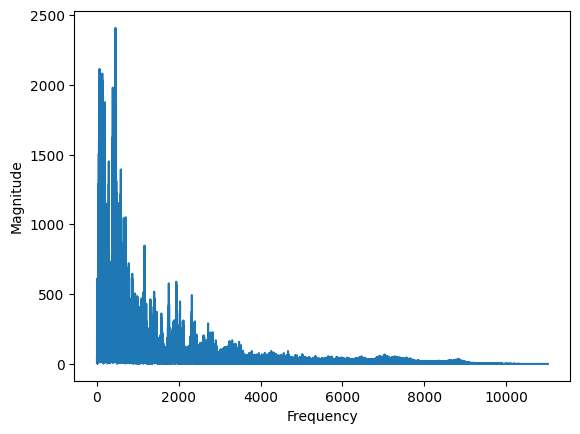

In [20]:
plt.plot(left_frequency, left_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

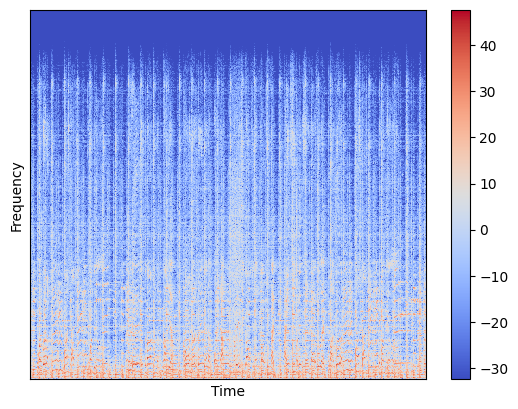

In [21]:
# short term fourier transform
# use stft and get a spectogram

no_of_samples_fft = 2048
# for calculating how much to move to get a point using hop_length.
hop_length = 512

stft = librosa.core.stft(signal, hop_length = hop_length, n_fft = no_of_samples_fft)

spectogram = np.abs(stft)

log_spectogram = librosa.amplitude_to_db(spectogram)

librosa.display.specshow(log_spectogram, sr=sr, hop_length = hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()
# this indicates that there is sound of lower energy 

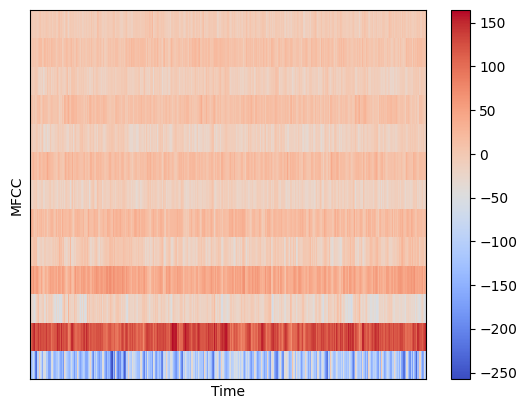

In [23]:
# MFCC's calculation
# n_mffc -> no. of mfcc's coefficeints
MFFCs = librosa.feature.mfcc(y=signal, n_fft = no_of_samples_fft, hop_length = hop_length, n_mfcc=13)

librosa.display.specshow(MFFCs, sr=sr, hop_length = hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()